# **Part 1: Exploratory Data Analysis (EDA)**

###    Objective: To understand the dataset's structure, characteristics, and relationships between features.

###    Task: Start by loading the dataset into a pandas DataFrame. Explore the data with different commands.

       Hint: Use pd.read_csv() to load the data, then .head() and .info().

###    Task: The target variable "target" indicates the presence of heart disease. Visualize the distribution of this variable using a bar chart to see if the classes are balanced.

        Hint: Use .value_counts()

###    Task: Create a correlation matrix of all the features in the dataset and display it as a heatmap. This will help identify which variables are most strongly related to each other.

        Hint: Use df.corr() to create a heatmap.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('data/heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/tmp/ipykernel_13817/2573912380.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new)


Text(0.5, 0, 'Presence of Heart Disease')

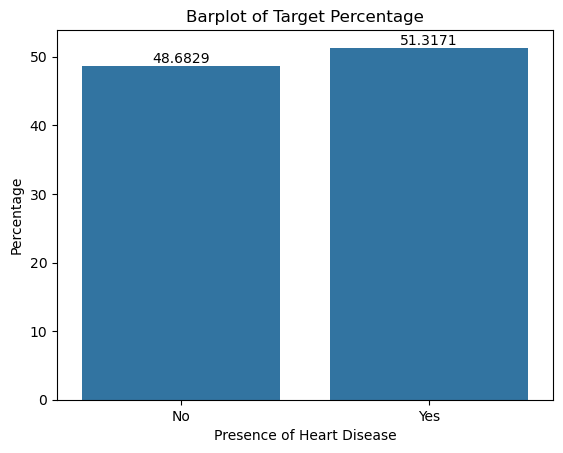

In [13]:
new = ['No','Yes']
ax = sns.countplot(df, x = 'target', stat= 'percent')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(new)
plt.title('Barplot of Target Percentage')
plt.ylabel('Percentage')
plt.xlabel('Presence of Heart Disease')

<Axes: >

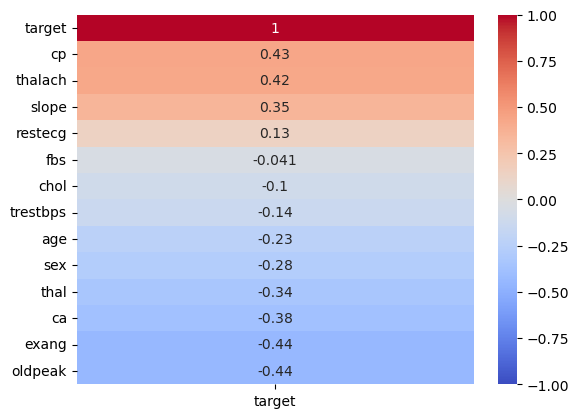

In [19]:
sns.heatmap(df.corr()[['target']].sort_values(by = 'target', ascending = False), 
           vmin = -1, 
           vmax = 1, 
           annot = True, 
           cmap = 'coolwarm')

# **Part 2: Model Training**

###    Objective: To prepare the data and train a classification model.

###    Task: Separate the dataset into two variables: X for the features (all columns except target) and y for the target variable (target column).

        Hint: Use .drop() to create the feature matrix X and simple indexing to create the target vector y.

###    Task: Split the X and y data into training and testing sets. Use an 80/20 split, where 80% is for training and 20% for testing.

        Hint: Use sklearn.model_selection.train_test_split().

###    Task: Import the RandomForestClassifier from scikit-learn. Instantiate the model and train it using the training data you created in the previous step.

        EHint: Use RandomForestClassifier() to create an instance, then .fit() on the training data.

In [16]:
df.corr()[['target']].sort_values(by = 'target', ascending = False)

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


In [21]:
X = df[['cp','thalach','exang','oldpeak']]

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42, stratify= y)

In [22]:
rfc = RandomForestClassifier(random_state= 42)

rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# **Part 3: Model Evaluation**

###    Objective: To evaluate how well the trained model performs on new, unseen data.

###    Task: Use your trained Random Forest model to make predictions on the test data. Store these predictions in a new variable.

        Hint: Use the .predict() method on your trained model with the test features.

###    Task: Calculate and print the accuracy of your model's predictions on the test set.

        Hint: Use sklearn.metrics.accuracy_score().

###    Task: Create and display a confusion matrix for your model's predictions to better understand its performance. A confusion matrix shows the number of correct and incorrect predictions for each class.

        Hint: Use sklearn.metrics.confusion_matrix().

In [34]:
y_pred = rfc.predict(X_test)

In [36]:
rfc.score(X_test, y_test)

0.9658536585365853

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:
precision_score(y_test, y_pred, average='binary')

0.9711538461538461

In [39]:
recall_score(y_test, y_pred, average='binary')

0.9619047619047619

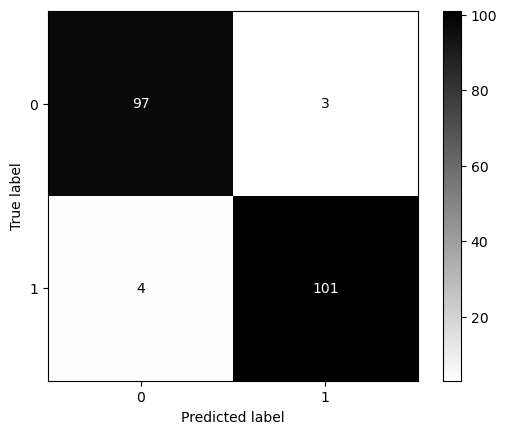

In [27]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap = 'binary')

# **Part 4: Feature Importance**

###    Objective: To identify which features were most influential in the model's predictions.

###    Task: Extract the feature importances from your trained Random Forest model. Create a pandas Series from these importances, and then visualize the top features using a bar chart.

        Hint: Access model.feature_importances_. Create a pd.Series from this, and use sns.barplot() to plot it.

Text(0.5, 0, 'Feature')

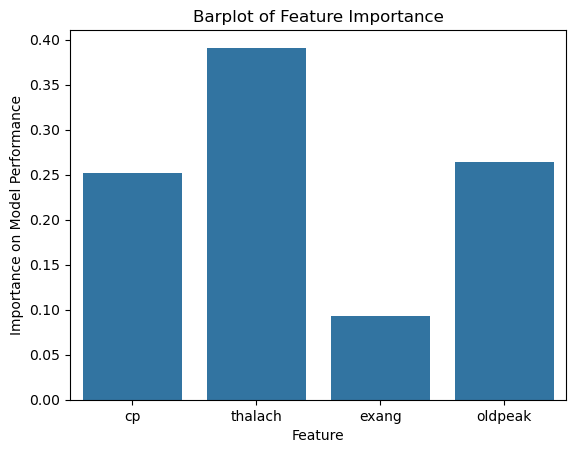

In [32]:
#Write your code here
sns.barplot(pd.Series(rfc.feature_importances_, index= X.columns))
plt.title('Barplot of Feature Importance')
plt.ylabel('Importance on Model Performance')
plt.xlabel('Feature')

# **Provide insights & conclusions:**

### - How accurate was the RandomForest model?
> Has an accuracy score of around 96 %, so it is pretty great
### - What about the precision and recall for both classes?
> precission and recall had similar scores to that of the accuracy score
### - What was the most influential/important factors in the model?
> The most impoortant one was definitely 'thalach', which refers to the maximum heart rate a client achieved